# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
    1. [Dropping Data](#Dropping-Data)
    2. [Derived Data](#Derived-Data)
5. [Analisis de Datos](#Analisis-de-Datos)
    1. [Analisis-Univariable](#Analisis-Univariable)
        1. [Plot Numeric Data](#Plot-Numeric-Data)
        2. [Plot Categorical Data](#Plot-Categorical-Data)
    2. [Analisis-Bivariable](#Analisis-Bivariable)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
    1. [Splitting data into Train Test](#Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#Model-Building)
    1. [Ridge Regression](#Ridge-Regression)
    2. [Lasso Regression](#Lasso-Regression)
    3. [ElasticNet Regression](#ElasticNet-Regression)
8. [Conclusions y Observaciones](#Conclusiones-y-Observaciones)

# Introduccion

### Integrates de Grupo:
* Omar Alavi (email_1)
* Raul Molina (raulmauri2000@gmail.com)
...

## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.

### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# Configuracion e Instalacion

In [60]:
!pip install prettytable

In [61]:

# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import sys
import math
import seaborn as sns

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV


# Importar Librerias de Estadistica
from prettytable import PrettyTable
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import RobustScaler
# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format

In [62]:
# Leer el DATASET CSV con en un Dataframe.

# Direccion relativa del Dataset
DATA_FILE_PATH = '/content/dataset.csv'

raw_data = pd.read_csv(DATA_FILE_PATH)
raw_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL        65.00     8450   Pave   NaN      Reg   
1        2          20       RL        80.00     9600   Pave   NaN      Reg   
2        3          60       RL        68.00    11250   Pave   NaN      IR1   
3        4          70       RL        60.00     9550   Pave   NaN      IR1   
4        5          60       RL        84.00    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL        62.00     7917   Pave   NaN      Reg   
1456  1457          20       RL        85.00    13175   Pave   NaN      Reg   
1457  1458          70       RL        66.00     9042   Pave   NaN      Reg   
1458  1459          20       RL        68.00     9717   Pave   NaN      Reg   
1459  1460          20       RL        75.00     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Entendimiento de los Datos

In [63]:
df=raw_data.copy()

In [64]:
# generamos un resumen estadisticos de nuestras variables
df.describe()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.00     1460.00      1201.00   1460.00      1460.00      1460.00   
mean   730.50       56.90        70.05  10516.83         6.10         5.58   
std    421.61       42.30        24.28   9981.26         1.38         1.11   
min      1.00       20.00        21.00   1300.00         1.00         1.00   
25%    365.75       20.00        59.00   7553.50         5.00         5.00   
50%    730.50       50.00        69.00   9478.50         6.00         5.00   
75%   1095.25       70.00        80.00  11601.50         7.00         6.00   
max   1460.00      190.00       313.00 215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count    1460.00       1460.00     1452.00     1460.00  ...     1460.00   
mean     1971.27       1984.87      103.69      443.64  ...       94.24   
std        30.20         20.65      181.07      456.10  ...      125.34   
min      1872.00       1950.00        0.00        0.00  ...        0.00   
25%      1954.00       1967.00        0.00        0.00  ...        0.00   
50%      1973.00       1994.00        0.00      383.50  ...        0.00   
75%      2000.00       2004.00      166.00      712.25  ...      168.00   
max      2010.00       2010.00     1600.00     5644.00  ...      857.00   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
count      1460.00        1460.00    1460.00      1460.00   1460.00  1460.00   
mean         46.66          21.95       3.41        15.06      2.76    43.49   
std          66.26          61.12      29.32        55.76     40.18   496.12   
min           0.00           0.00       0.00         0.00      0.00     0.00   
25%           0.00           0.00       0.00         0.00      0.00     0.00   
50%          25.00           0.00       0.00         0.00      0.00     0.00   
75%          68.00           0.00       0.00         0.00      0.00     0.00   
max         547.00         552.00     508.00       480.00    738.00 15500.00   

       MoSold  YrSold  SalePrice  
count 1460.00 1460.00    1460.00  
mean     6.32 2007.82  180921.20  
std      2.70    1.33   79442.50  
min      1.00 2006.00   34900.00  
25%      5.00 2007.00  129975.00  
50%      6.00 2008.00  163000.00  
75%      8.00 2009.00  214000.00  
max     12.00 2010.00  755000.00  

[8 rows x 38 columns]

In [65]:
# verificamos los tipos de datos, si existen datos faltantes en nuestros features(variables)
df.info()
## de la informacion proporcionada por la funcion info vemos que tenemos datos faltantes en muchas de nuestras variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 Nuestro dataset esta conformada por 81 columnas 80 predictores y un tarjet, ademas cuenta con 1460 registros

In [66]:
######## funciones adicionales

# muestra una descripcion completa del datafame con el tipo de dato de la columa, cantidad de valroes nulosy valores unicos
def informacion_df(df):
    print(f'Numero de filas:  {df.shape[0]}')
    print(f'Numero de columnas:  {df.shape[1]}')
    x = PrettyTable()
    x.field_names = ["Columnas", "Valores unicos", "Valores Nulos", "Tipo de Dato", "Valores"]
    for col in df.columns:
        x.add_row([col, len(df[col].unique()), df[col].isnull().sum(), df[col].dtype, df[col].unique()[0:3]])
    x.sortby = "Tipo de Dato"
    print(x)


# muestra inforamcion de las columnas con valores nulos
def mostrar_columnas_con_nulos(df):
    # Calcular el total de registros en el DataFrame
    total_registros = len(df)

    # Calcular el número de valores nulos en cada columna
    nulos_por_columna = df.isnull().sum()

    # Calcular el porcentaje de valores nulos en relación con el total de registros
    porcentaje_nulos_por_columna = (nulos_por_columna / total_registros) * 100

    # Obtener los tipos de dato de cada columna
    tipos_de_dato_por_columna = df.dtypes


    # Crear un DataFrame con las columnas y sus porcentajes de valores nulos
    info_columnas_nulos = pd.DataFrame({
        'Columna': nulos_por_columna.index,
        'Valores Nulos': nulos_por_columna.values,
        'Porcentaje Nulos': porcentaje_nulos_por_columna.values,
        'Tipo de Dato': tipos_de_dato_por_columna.values
    })

    # Filtrar las columnas que tienen valores nulos
    columnas_con_nulos = info_columnas_nulos[info_columnas_nulos['Valores Nulos'] > 0]

    # Imprimir las columnas con valores nulos y sus porcentajes
    print("Columnas con valores nulos:")
    print(columnas_con_nulos)

#
def eliminar_columnas_con_nulos(df, umbral=0.5):
    """
    Elimina las columnas con un porcentaje de valores nulos superior al umbral especificado.

    :param df: DataFrame de pandas.
    :param umbral: Umbral de porcentaje de valores nulos (valor entre 0 y 1).
    :return: DataFrame sin las columnas eliminadas.
    """
    # Calcular el número máximo de valores nulos permitidos en una columna
    num_max_nulos = len(df) * umbral

    # Identificar las columnas que cumplen con el umbral de valores nulos
    columnas_a_eliminar = df.columns[df.isna().sum() > num_max_nulos]

    # Eliminar las columnas que cumplen con el umbral de valores nulos
    df_sin_columnas_nulas = df.drop(columns=columnas_a_eliminar)

    return df_sin_columnas_nulas


In [67]:
# Hacemos una descripcion mas especifica de nuestros datos
informacion_df(df)

Numero de filas:  1460
Numero de columnas:  81
+---------------+----------------+---------------+--------------+---------------------------------+
|    Columnas   | Valores unicos | Valores Nulos | Tipo de Dato |             Valores             |
+---------------+----------------+---------------+--------------+---------------------------------+
|    1stFlrSF   |      753       |       0       |    int64     |         [ 856 1262  920]        |
|    2ndFlrSF   |      417       |       0       |    int64     |          [854   0 866]          |
|   3SsnPorch   |       20       |       0       |    int64     |          [  0 320 407]          |
|  BedroomAbvGr |       8        |       0       |    int64     |             [3 4 1]             |
|   BsmtFinSF1  |      637       |       0       |    int64     |          [706 978 486]          |
|   BsmtFinSF2  |      144       |       0       |    int64     |          [  0  32 668]          |
|  BsmtFullBath |       4        |       0       |   

43 de los predictores son de tipo categorico y 38 son de tipo numerico

# Manipulacion y Limpieza de Datos

Eliminamos la columna "Id" ya que es un identificador

In [68]:

df=df.drop("Id",axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL        65.00     8450   Pave   NaN      Reg   
1          20       RL        80.00     9600   Pave   NaN      Reg   
2          60       RL        68.00    11250   Pave   NaN      IR1   
3          70       RL        60.00     9550   Pave   NaN      IR1   
4          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

Eliminamos los registros duplicados de nuestro dataset

In [69]:
df = df.drop_duplicates()

Buscamos las columnas que tiene valores nulos

In [70]:
mostrar_columnas_con_nulos(df)

Columnas con valores nulos:
         Columna  Valores Nulos  Porcentaje Nulos Tipo de Dato
2    LotFrontage            259             17.74      float64
5          Alley           1369             93.77       object
24    MasVnrType              8              0.55       object
25    MasVnrArea              8              0.55      float64
29      BsmtQual             37              2.53       object
30      BsmtCond             37              2.53       object
31  BsmtExposure             38              2.60       object
32  BsmtFinType1             37              2.53       object
34  BsmtFinType2             38              2.60       object
41    Electrical              1              0.07       object
56   FireplaceQu            690             47.26       object
57    GarageType             81              5.55       object
58   GarageYrBlt             81              5.55      float64
59  GarageFinish             81              5.55       object
62    GarageQual           

Hay valores nulos en las siguientes columnas: MasVnrArea, GarageYrBlt, LotFrontage, Electrical, MasVnrType, BsmtQual, BsmtCond, BsmtFinType1, BsmtExposure,BsmtFinType2, GarageType, GarageFinish,GarageQual, GarageCond, FireplaceQu, Fence, Alley,MiscFeature, PoolQC.

Despues de ver la descripcion de las variables o predictores del dataset con un alto porcentaje de nulos de ha concluido que estas columnas no son relevantes para la prediccion del precio del inmuble, por lo cual se procedera a eliminar estas columnas

In [71]:
umbral=0.5 # ponemos umbral de 50%
df = eliminar_columnas_con_nulos(df, umbral)
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL        65.00     8450   Pave      Reg         Lvl   
1             20       RL        80.00     9600   Pave      Reg         Lvl   
2             60       RL        68.00    11250   Pave      IR1         Lvl   
3             70       RL        60.00     9550   Pave      IR1         Lvl   
4             60       RL        84.00    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL        62.00     7917   Pave      Reg         Lvl   
1456          20       RL        85.00    13175   Pave      Reg         Lvl   
1457          70       RL        66.00     9042   Pave      Reg         Lvl   
1458          20       RL        68.00     9717   Pave      Reg         Lvl   
1459          20       RL        75.00     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 76 columns]

Vemos que 5 predictores han sido eliminados

In [72]:
mostrar_columnas_con_nulos(df)

Columnas con valores nulos:
         Columna  Valores Nulos  Porcentaje Nulos Tipo de Dato
2    LotFrontage            259             17.74      float64
23    MasVnrType              8              0.55       object
24    MasVnrArea              8              0.55      float64
28      BsmtQual             37              2.53       object
29      BsmtCond             37              2.53       object
30  BsmtExposure             38              2.60       object
31  BsmtFinType1             37              2.53       object
33  BsmtFinType2             38              2.60       object
40    Electrical              1              0.07       object
55   FireplaceQu            690             47.26       object
56    GarageType             81              5.55       object
57   GarageYrBlt             81              5.55      float64
58  GarageFinish             81              5.55       object
61    GarageQual             81              5.55       object
62    GarageCond           

Procedemos a imputar los valores nulos de los demas predictores (features)

Al tener un unico valor nulo en la columna  " Electrical" lo completamos con la moda

In [73]:
moda_electrical = df['Electrical'].mode()[0]  # Usamos [0] para obtener el primer valor de la moda

df['Electrical'].fillna(moda_electrical, inplace=True)

En que caso de las variables  de mamposteria

In [74]:
# para 'MasVnrArea' que es el Área de revestimiento de mampostería reemplazamos los valores nulos por 0
df['MasVnrArea'].fillna(0, inplace=True)

# para 'MasVnrType' que es Tipo de revestimiento de mampostería reemplazamos los valores nulos por 'None' como lo indica en la documentacion del dataset
df['MasVnrType'].fillna('None', inplace=True)

In [75]:
mostrar_columnas_con_nulos(df)

Columnas con valores nulos:
         Columna  Valores Nulos  Porcentaje Nulos Tipo de Dato
2    LotFrontage            259             17.74      float64
28      BsmtQual             37              2.53       object
29      BsmtCond             37              2.53       object
30  BsmtExposure             38              2.60       object
31  BsmtFinType1             37              2.53       object
33  BsmtFinType2             38              2.60       object
55   FireplaceQu            690             47.26       object
56    GarageType             81              5.55       object
57   GarageYrBlt             81              5.55      float64
58  GarageFinish             81              5.55       object
61    GarageQual             81              5.55       object
62    GarageCond             81              5.55       object


Para el caso de los predictores que tienen relacion con el Garage

In [76]:
'''
GarageType: Tipo de garaje.
GarageYrBlt: Año de construcción del garaje.
GarageFinish: Acabado del garaje.
GarageQual: Calidad del garaje.
GarageCond: Condición del garaje.
'''
# Observando el dataset los registros que no tienen garage son los que tienen valores nulos en las columnas que pertenecen a la descripcion del garage,
# por lo mencionado se completaran estos campos con el valor 'NA' que significa no garaje
columnas_garage=['GarageType','GarageFinish','GarageQual','GarageCond']
for col in columnas_garage:
    df[col] = df[col].fillna('NA')


###########################################
#para la columna 'GarageYrBlt'= Año de construcción del garaje, reemplazaremos los valores nulos con 0

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)


In [77]:
mostrar_columnas_con_nulos(df)

Columnas con valores nulos:
         Columna  Valores Nulos  Porcentaje Nulos Tipo de Dato
2    LotFrontage            259             17.74      float64
28      BsmtQual             37              2.53       object
29      BsmtCond             37              2.53       object
30  BsmtExposure             38              2.60       object
31  BsmtFinType1             37              2.53       object
33  BsmtFinType2             38              2.60       object
55   FireplaceQu            690             47.26       object


Para el caso de los predictores que tienen relacion con el Sotano

In [78]:
'''
BsmtQual: Calidad del sótano.
BsmtCond: Condición del sótano.
BsmtExposure: Exposición del sótano.
BsmtFinType1: Tipo de acabado del sótano 1.
BsmtFinType2: Tipo de acabado del sótano 2.

'''
#para las columnas referidas al sotano reemplazamos los valores nulos por 'NA'= sin sotano, como lo indica la documentacion
for col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    df[col] = df[col].fillna('NA')

In [79]:
mostrar_columnas_con_nulos(df)

Columnas con valores nulos:
        Columna  Valores Nulos  Porcentaje Nulos Tipo de Dato
2   LotFrontage            259             17.74      float64
55  FireplaceQu            690             47.26       object


Para el caso del predictor **LotFontage** utilizamos la media

In [80]:
# para la columna 'LotFrontage' que es la Longitud de la frontera de la parcela colocamos la media
media=df['LotFrontage'].mean()
df['LotFrontage'].fillna(media, inplace=True)

In [81]:
mostrar_columnas_con_nulos(df)

Columnas con valores nulos:
        Columna  Valores Nulos  Porcentaje Nulos Tipo de Dato
55  FireplaceQu            690             47.26       object


Para el caso del predictor FireplaceQu (Calidad de la chimenea)

In [82]:
###### para la variable 'FireplaceQu' colocamos el valor NA que significa no tiene

df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

In [83]:
mostrar_columnas_con_nulos(df)

Columnas con valores nulos:
Empty DataFrame
Columns: [Columna, Valores Nulos, Porcentaje Nulos, Tipo de Dato]
Index: []


#Análisis y Tratamiento de Valores Atípicos

Procedemos a eliminar los valores atipicos de los predictores(features)

In [84]:
#import pandas as pd



# Seleccionar solo las columnas numéricas
#columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
columnas_numericas =['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1'
,'TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF'
,'SalePrice']
# Función para obtener máscaras booleanas de los outliers
def get_outlier_mask(df, column):
    # Calcular el rango intercuartil (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para valores atípicos
    lower_limit = Q1 - 2 * IQR
    upper_limit = Q3 + 2 * IQR

    # Devolver máscara booleana donde 'True' indica un outlier
    return ~((df[column] >= lower_limit) & (df[column] <= upper_limit))

# Crear una máscara general donde 'True' indica un outlier en alguna columna
general_mask = pd.Series(False, index=df.index)

for columna in columnas_numericas:
    general_mask = general_mask | get_outlier_mask(df, columna)

# Filtrar los registros que NO son outliers
df_cleaned = df[~general_mask]

# Mostrar resultados

print(f"Original shape: {df.shape}")

Original shape: (1460, 76)


In [85]:
df_cleaned

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL        65.00     8450   Pave      Reg         Lvl   
1             20       RL        80.00     9600   Pave      Reg         Lvl   
2             60       RL        68.00    11250   Pave      IR1         Lvl   
3             70       RL        60.00     9550   Pave      IR1         Lvl   
4             60       RL        84.00    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL        62.00     7917   Pave      Reg         Lvl   
1456          20       RL        85.00    13175   Pave      Reg         Lvl   
1457          70       RL        66.00     9042   Pave      Reg         Lvl   
1458          20       RL        68.00     9717   Pave      Reg         Lvl   
1459          20       RL        75.00     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1237 rows x 76 columns]

In [86]:
df=df_cleaned

# Analisis de Datos

## Analisis-Univariable

In [87]:
# Seleccionamos solo las columnas numericas
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])
print(columnas_numericas.columns)
print('cantidad:',len(columnas_numericas.columns))


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
cantidad: 37


In [88]:
# Seleccionamos solo las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object'])
print(columnas_categoricas.columns)
print('cantidad:',len(columnas_categoricas.columns))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
cantidad: 39


Graficamos la distribucion de los precios de las casas

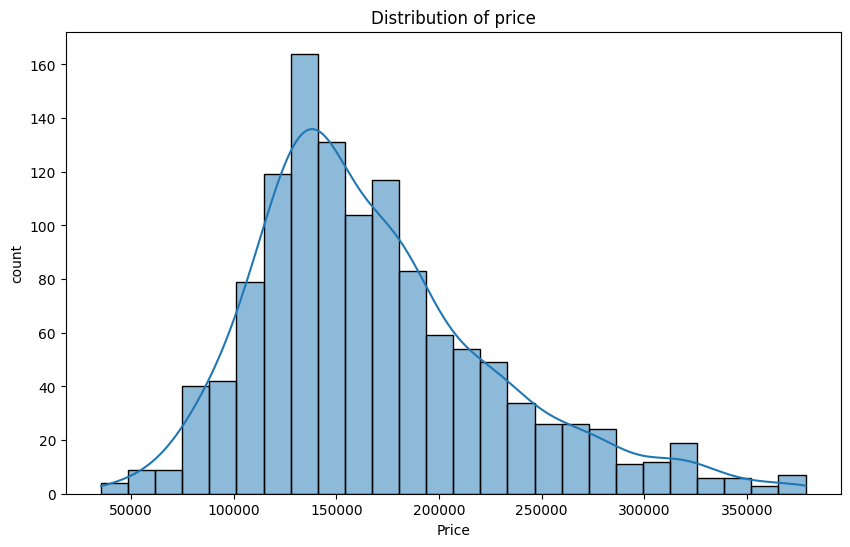

In [89]:

# graficamos la distribucion de los precios de las casas
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'],kde=True)
plt.title("Distribution of price")
plt.xlabel("Price")
plt.ylabel("count")
plt.show()

Del grafico anterior podemos decir que la maoyoria de los precios oscila entre 100000 a 125000. Tenemos un histograma sesgado a la derecha que indica valores atípicos

Datos Numericos

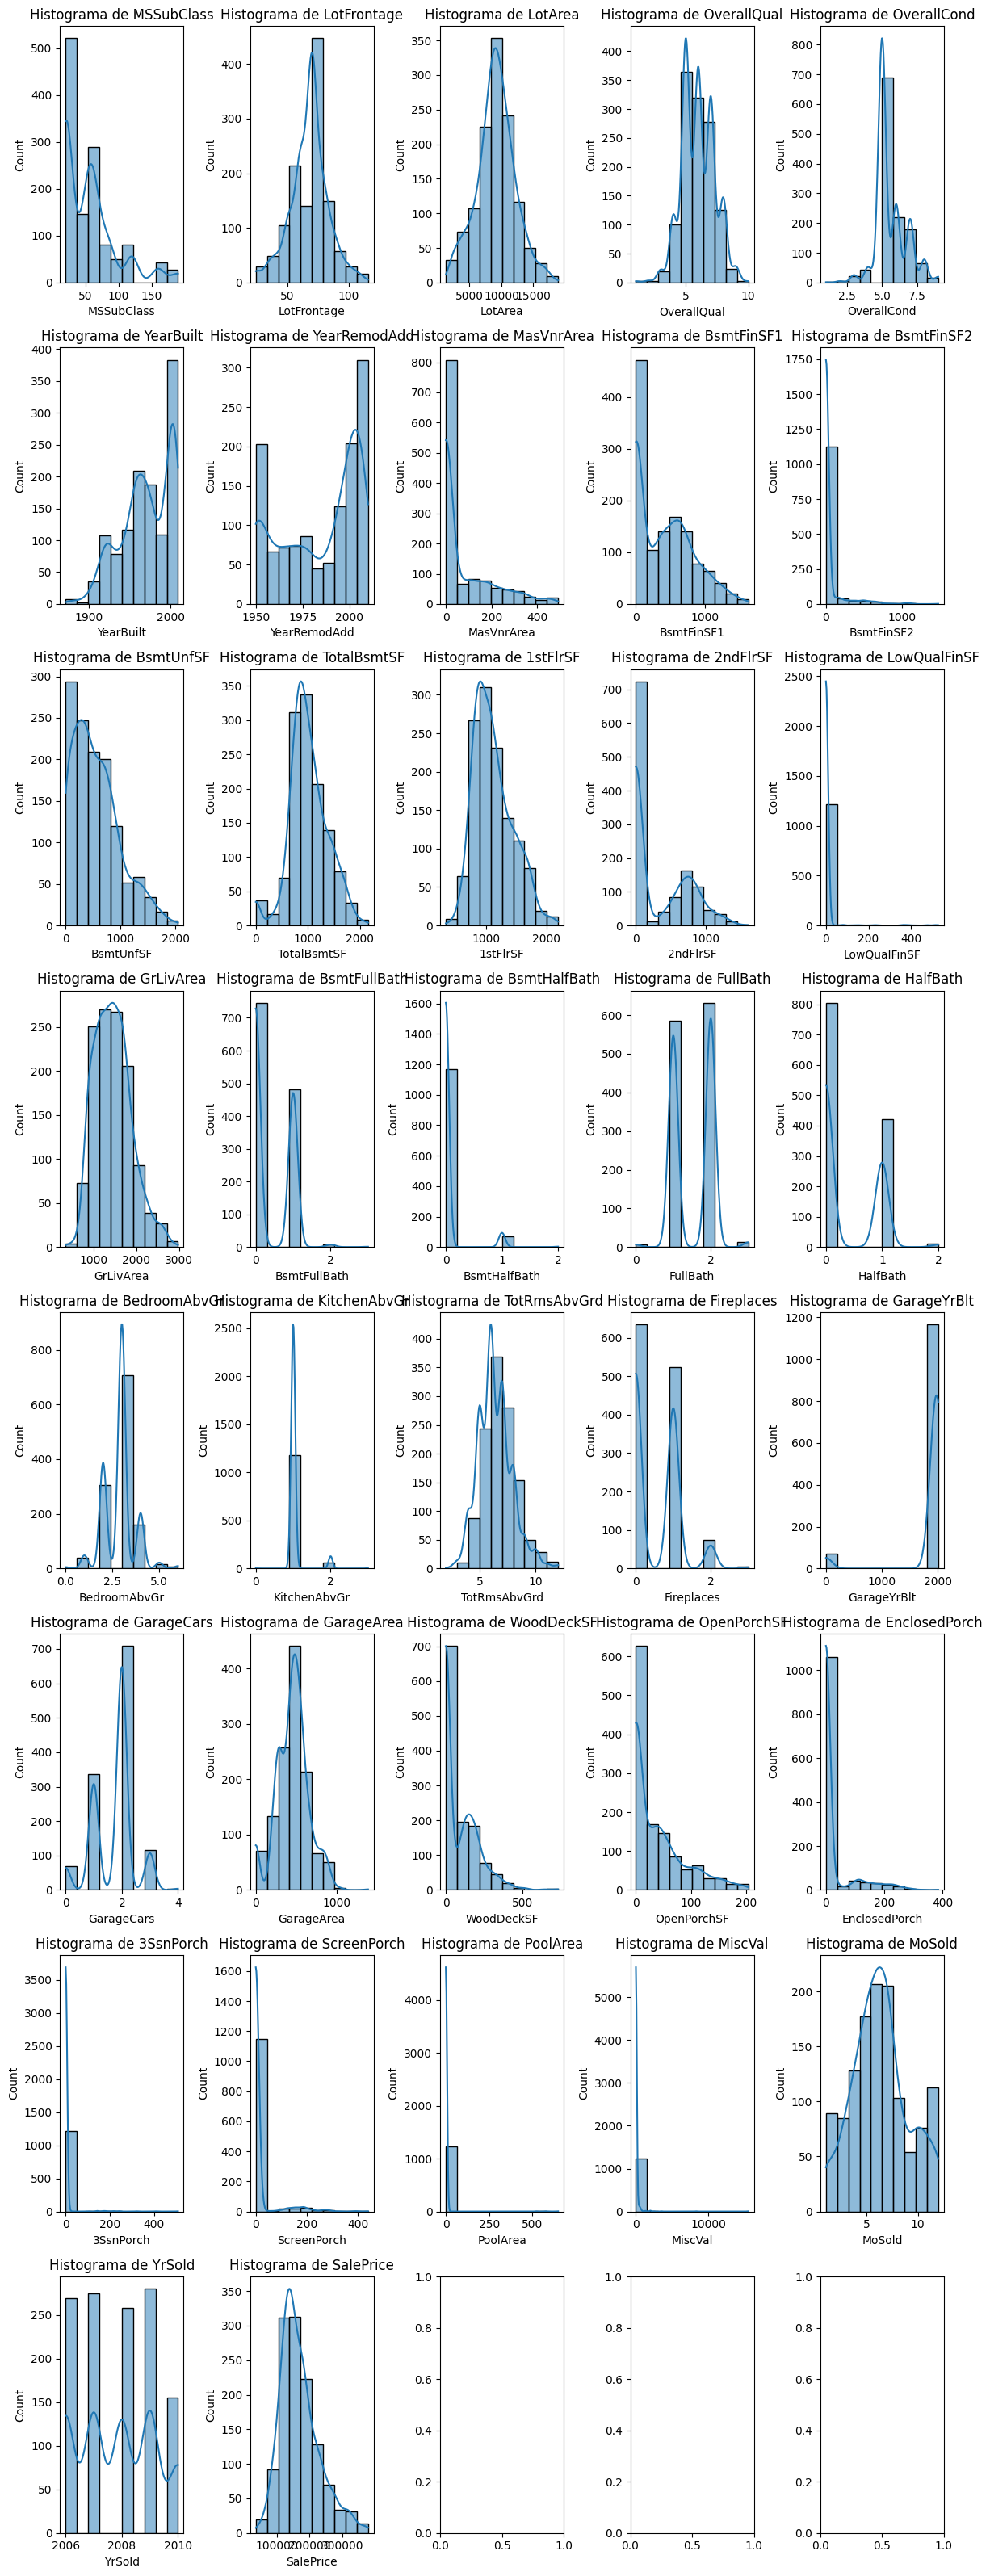

In [90]:
####### Analisamos nuestros features numericos

num_columnas_subplots = 5

# Calcular el número total de subplots necesarios
num_subplots = len(columnas_numericas.columns)

# Calcular el número de filas necesario para acomodar todos los subplots
num_filas = (num_subplots - 1) // num_columnas_subplots + 1

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(num_filas, num_columnas_subplots, figsize=(12, 4*num_filas))

# Iterar a través de las columnas numéricas y crear histogramas en los subplots
for i, col in enumerate(columnas_numericas.columns):
    # Calcular las coordenadas del subplot actual
    fila_actual = i // num_columnas_subplots
    columna_actual = i % num_columnas_subplots

    # Crear el histograma en el subplot actual utilizando Seaborn
    sns.histplot(data=columnas_numericas, x=col, ax=axes[fila_actual, columna_actual], bins=10, kde=True)
    axes[fila_actual, columna_actual].set_title(f'Histograma de {col}')  # Establecer el título del subplot

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

* El promedio del area de una casa esta por  10000 pies
*  En la columna PoolArea, más del 99% de sus entradas son ceros

In [91]:
fig = plt.figure(figsize=(16, 30))
for i in range(len(columnas_numericas.columns)) :
    fig.add_subplot(8, 5, i + 1)
    sns.boxplot(y = columnas_numericas.iloc[:, i]) # plot vertical
plt.tight_layout()
plt.show()

Datos categoricos

In [92]:
################## Analizamos nuestros datos caetgoricos ##################

num_columnas_subplots = 4

# Calcula el número total de subplots necesarios
num_subplots = len(columnas_categoricas.columns)

# Calcula el número de filas necesario para acomodar todos los subplots
num_filas = (num_subplots - 1) // num_columnas_subplots + 1

# Crea una figura y ejes para los subplots
fig, axes = plt.subplots(num_filas, num_columnas_subplots, figsize=(16, 4*num_filas))

# Itera a través de las columnas categóricas y crea los histogramas en los subplots
for i, col in enumerate(columnas_categoricas.columns):
    # Calcula las coordenadas del subplot actual
    fila_actual = i // num_columnas_subplots
    columna_actual = i % num_columnas_subplots

    # Crea el histograma en el subplot actual usando Seaborn
    sns.histplot(data=df, x=col, ax=axes[fila_actual, columna_actual], bins=10)
    axes[fila_actual, columna_actual].set_title(col)  # Establece el título del subplot

    # Rota las etiquetas del eje x para mejorar la legibilidad
    axes[fila_actual, columna_actual].tick_params(axis='x', rotation=45)

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra los subplots
plt.show()

* La grafica muestra que los precios mas altos las tienen las casas de tipo 1Fam (viviendas unifamiliares) y TwnhsE (Townhouse End Unit).
* La mayoria de las casas tiene un tamaño entre 700 y 200 pies cuadrados
* La mayoria de las casas pertenecen a la zona de tipo RL (Zona residencial de baja demanda).
* La mayoria de las casas tienen entre una cocina de calidad media a buena
*La mayoria de las casas tienen un acceso desde la calle pavimentada
*La mayoria de las casas tiene un lote de forma regular
* La mayoria de las casas cuentan con todos los servicios basicos(luz , agua, gas , etc)

## Analisis-Bivariable

In [93]:
##################################### Analizamos  la relacion que hay entre el precio de la casa y el area del lote
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['LotArea'],y=df['SalePrice'],data=df,palette="Set2")

<Axes: xlabel='LotArea', ylabel='SalePrice'>

In [94]:
################################################### Analizamos la relacion de nuestras variables categoricas con nuestro tarjet(SalePrice)

# Establece el número de columnas para los subplots (2 en este caso)
num_columnas_subplots = 3

# Calcula el número total de subplots necesarios
num_subplots = len(columnas_categoricas.columns)

# Calcula el número de filas necesario para acomodar todos los subplots
num_filas = (num_subplots - 1) // num_columnas_subplots + 1

# Crea una figura y ejes para los subplots
fig, axes = plt.subplots(num_filas, num_columnas_subplots, figsize=(15, 5*num_filas))

# Itera a través de las columnas categóricas y crea los gráficos de caja en los subplots
for i, col in enumerate(columnas_categoricas.columns):
    # Calcula las coordenadas del subplot actual
    fila_actual = i // num_columnas_subplots
    columna_actual = i % num_columnas_subplots

    # Crea el gráfico de caja en el subplot actual
    sns.boxplot(x=df[col], y=df['SalePrice'], ax=axes[fila_actual, columna_actual])
    axes[fila_actual, columna_actual].set_title(col)  # Establece el título del subplot

    # Rota las etiquetas del eje x para mejorar la legibilidad
    axes[fila_actual, columna_actual].tick_params(axis='x', rotation=45)

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra los subplots
plt.show()

De las graficas podemos ver:

Los precios mas altos estan en los vecindarios de NridgHt y StoneBr

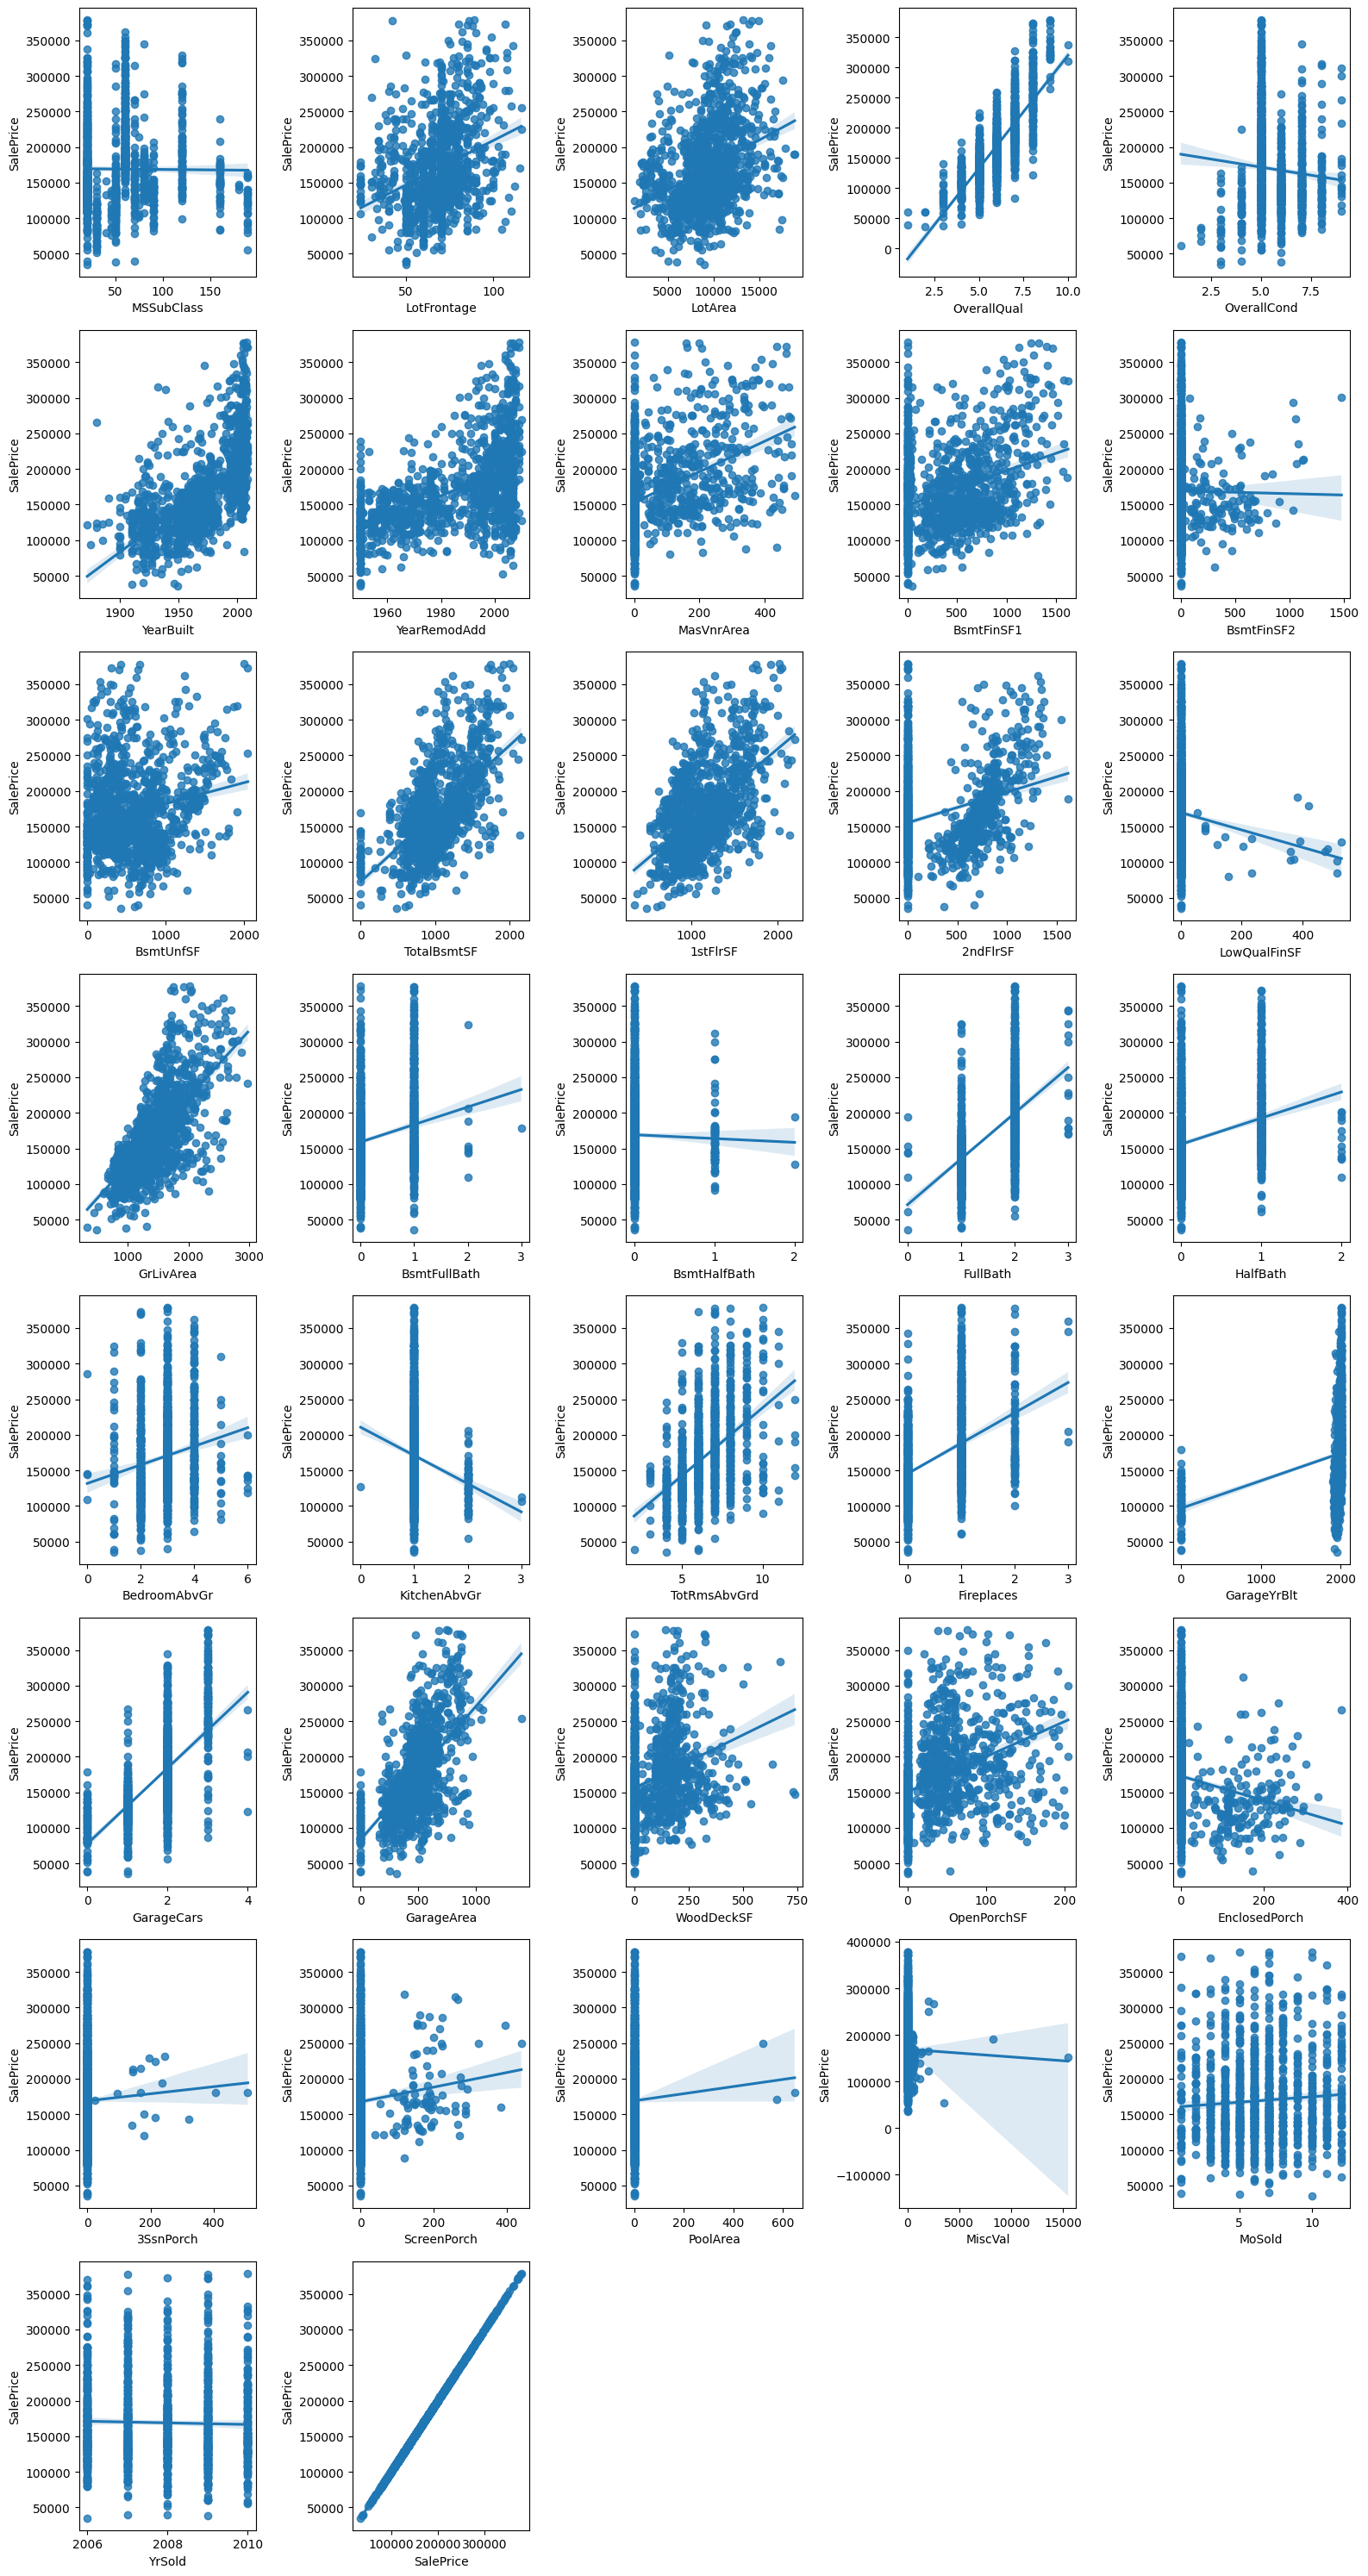

In [95]:
### Graficamos la  correlacion entre nuestros features numericos  y nuestro Target
fig = plt.figure(figsize=(16, 30))
for i in range(len(columnas_numericas.columns)) :
    fig.add_subplot(8, 5, i + 1)
    sns.regplot(x = columnas_numericas.iloc[:, i], y = df.SalePrice)
plt.tight_layout()
plt.show()

OveralQual afecta directamente al precio de la vivienda.

Las casas construidas después de 1980 tienen más valor.

Las casas con mayor superficie habitable en el primer piso, en la planta baja, en el garaje y en el sótano tienden a venderse a precios más altos.

Las casas con más zonas de parquing son más caras.

### Vemos la correlacion que existe entre variables

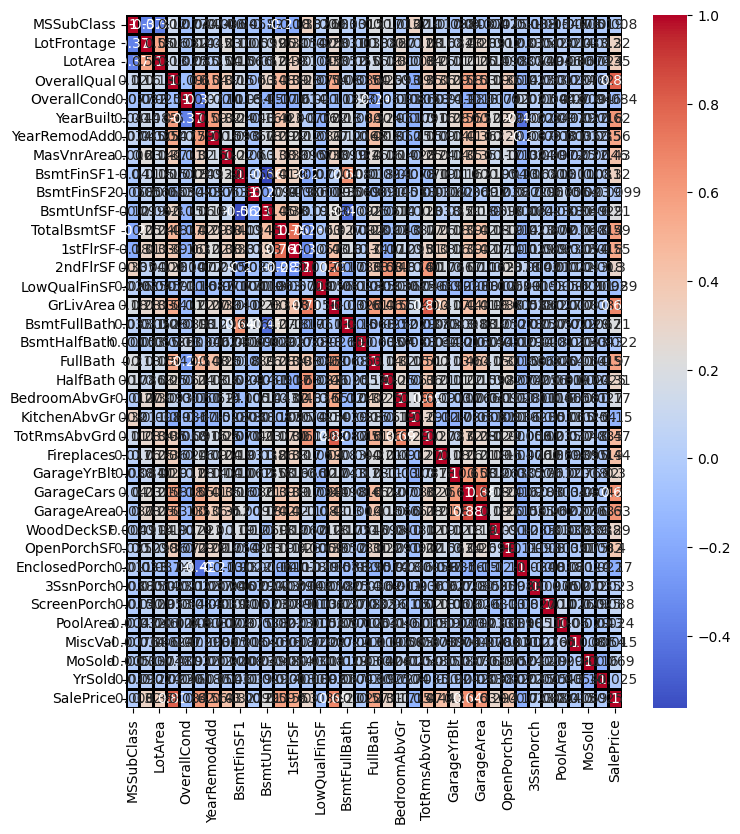

In [96]:
correlacion=df.corr()
plt.figure(figsize=(8,9))
sns.heatmap(correlacion,annot=True, linecolor='black', linewidths=1, cmap='coolwarm')
plt.show()

Muchas variables independientes están muy correlacionadas  por ejemplo AgeBuilt , AgeRemodelled , GarageAge , TotRmsAbvGrd, GrLivArea etc.

## Vemos la correlacion que existe entre las features (atributos) y nuestro target

In [97]:
correlacion['SalePrice'].abs().sort_values(ascending=False)

SalePrice       1.00
OverallQual     0.81
GrLivArea       0.68
GarageCars      0.64
GarageArea      0.63
YearBuilt       0.62
TotalBsmtSF     0.59
FullBath        0.57
YearRemodAdd    0.56
1stFlrSF        0.55
TotRmsAbvGrd    0.47
Fireplaces      0.44
MasVnrArea      0.43
OpenPorchSF     0.40
LotArea         0.35
BsmtFinSF1      0.32
LotFrontage     0.32
HalfBath        0.31
GarageYrBlt     0.30
2ndFlrSF        0.30
WoodDeckSF      0.29
BsmtUnfSF       0.21
BsmtFullBath    0.21
EnclosedPorch   0.17
BedroomAbvGr    0.17
KitchenAbvGr    0.15
LowQualFinSF    0.09
ScreenPorch     0.09
OverallCond     0.08
MoSold          0.07
YrSold          0.03
PoolArea        0.02
3SsnPorch       0.02
BsmtHalfBath    0.02
MiscVal         0.01
BsmtFinSF2      0.01
MSSubClass      0.01
Name: SalePrice, dtype: float64

El precio de la casa(SalePrice)  está altamente correlacionado (positivamente) con TotalBasementSF, 1stFlrSF, Fullbath, TotRmsAbvGrd, GrLivArea, GarageCars, GarageArea

El precio de la casa está negativamente correlacionado con AgeBuilt, AgeRemodelled y GarageAge.

In [98]:
#eliminamos los features con poca correlacion con el target
umbral_correlacion = 0.25  # Ajusta el umbral según tus necesidades
features_seleccionadas = correlacion[correlacion.abs()['SalePrice'] <= umbral_correlacion].index.tolist()

#df=df.drop([features_seleccionadas], axis = 1)


In [99]:
# eliminamos las features que tienen alta correlacion entre si
matriz_correlacion=correlacion
umbral_correlacion = 0.7  # Ajusta el umbral según tus necesidades
pares_correlacionados = []

# Recorre la matriz de correlación para encontrar pares de características altamente correlacionadas
for i in range(len(matriz_correlacion.columns)):
    for j in range(i):
        if abs(matriz_correlacion.iloc[i, j]) > umbral_correlacion:
            par = (matriz_correlacion.columns[i], matriz_correlacion.columns[j])
            pares_correlacionados.append(par)



# Crear una lista de características a eliminar
caracteristicas_a_eliminar = set()

for par in pares_correlacionados:
    caracteristica1, caracteristica2 = par
    # Eliminar una de las características del par (por ejemplo, caracteristica1)
    if not (caracteristica1 !='SalePrice' or  caracteristica1 !='SalePrice'):
        caracteristicas_a_eliminar.add(caracteristica1)

# Eliminar las características seleccionadas
#df = df.drop(caracteristicas_a_eliminar, axis=1)

In [100]:
print(df)

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL        65.00     8450   Pave      Reg         Lvl   
1             20       RL        80.00     9600   Pave      Reg         Lvl   
2             60       RL        68.00    11250   Pave      IR1         Lvl   
3             70       RL        60.00     9550   Pave      IR1         Lvl   
4             60       RL        84.00    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL        62.00     7917   Pave      Reg         Lvl   
1456          20       RL        85.00    13175   Pave      Reg         Lvl   
1457          70       RL        66.00     9042   Pave      Reg         Lvl   
1458          20       RL        68.00     9717   Pave      Reg         Lvl   
1459          20       RL        75.00     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPor

# Preparacion de Datos y Modelado


## Convertimos nuestras varibles categoricas en numericas

In [101]:
all_data = pd.get_dummies(df, drop_first=True)
informacion_df( all_data)

Numero de filas:  1237
Numero de columnas:  239
+-----------------------+----------------+---------------+--------------+------------------------+
|        Columnas       | Valores unicos | Valores Nulos | Tipo de Dato |        Valores         |
+-----------------------+----------------+---------------+--------------+------------------------+
|    BldgType_2fmCon    |       2        |       0       |    uint8     |         [0 1]          |
|    BldgType_Duplex    |       2        |       0       |    uint8     |         [0 1]          |
|     BldgType_Twnhs    |       2        |       0       |    uint8     |         [0 1]          |
|    BldgType_TwnhsE    |       2        |       0       |    uint8     |         [0 1]          |
|      BsmtCond_Gd      |       2        |       0       |    uint8     |         [0 1]          |
|      BsmtCond_NA      |       2        |       0       |    uint8     |         [0 1]          |
|      BsmtCond_Po      |       2        |       0       |   

In [102]:
'''
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in columnas_categoricas.columns :
    df[i] = encoder.fit_transform(columnas_categoricas[i].values.reshape(-1, 1))
 '''

'\nfrom sklearn.preprocessing import LabelEncoder\n\nencoder = LabelEncoder()\nfor i in columnas_categoricas.columns :\n    df[i] = encoder.fit_transform(columnas_categoricas[i].values.reshape(-1, 1))\n '

In [103]:
df=all_data
df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60        65.00     8450            7            5       2003   
1             20        80.00     9600            6            8       1976   
2             60        68.00    11250            7            5       2001   
3             70        60.00     9550            7            5       1915   
4             60        84.00    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60        62.00     7917            6            5       1999   
1456          20        85.00    13175            6            6       1978   
1457          70        66.00     9042            7            9       1941   
1458          20        68.00     9717            5            6       1950   
1459          20        75.00     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0             2003      196.00         706           0  ...               0   
1             1976        0.00         978           0  ...               0   
2             2002      162.00         486           0  ...               0   
3             1970        0.00         216           0  ...               0   
4             2000      350.00         655           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
1455          2000        0.00           0           0  ...               0   
1456          1988      119.00         790         163  ...               0   
1457          2006        0.00         275           0  ...               0   
1458          1996        0.00          49        1029  ...               0   
1459          1965        0.00         830         290  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456      

## Escalamos nuestros datos

In [104]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])
print(columnas_numericas.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [105]:
# Procedemos a escalar nuestros datos

columnas_a_escalar=columnas_numericas.columns
#columnas_a_escalar = X.columns
#scaler = RobustScaler()
scaler= StandardScaler()
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])


In [106]:
X=df.drop(['SalePrice'], axis = 1)
Y=df['SalePrice']

In [107]:
X

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           0.11        -0.18    -0.24         0.80        -0.54       1.08   
1          -0.88         0.79     0.14         0.02         2.17       0.19   
2           0.11         0.01     0.69         0.80        -0.54       1.02   
3           0.36        -0.50     0.12         0.80        -0.54      -1.82   
4           0.11         1.05     1.70         1.57        -0.54       0.98   
...          ...          ...      ...          ...          ...        ...   
1455        0.11        -0.37    -0.42         0.02        -0.54       0.95   
1456       -0.88         1.11     1.34         0.02         0.37       0.26   
1457        0.36        -0.11    -0.05         0.80         3.07      -0.96   
1458       -0.88         0.01     0.18        -0.75         0.37      -0.67   
1459       -0.88         0.47     0.25        -0.75         0.37      -0.17   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0             0.90        1.02        0.74       -0.29  ...               0   
1            -0.39       -0.62        1.42       -0.29  ...               0   
2             0.85        0.74        0.19       -0.29  ...               0   
3            -0.68       -0.62       -0.48       -0.29  ...               0   
4             0.76        2.31        0.62       -0.29  ...               0   
...            ...         ...         ...         ...  ...             ...   
1455          0.76       -0.62       -1.03       -0.29  ...               0   
1456          0.18        0.38        0.95        0.77  ...               0   
1457          1.04       -0.62       -0.34       -0.29  ...               0   
1458          0.57       -0.62       -0.90        6.39  ...               0   
1459         -0.92       -0.62        1.05        1.60  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456      

In [108]:
Y

0       0.66
1       0.21
2       0.91
3      -0.48
4       1.35
        ... 
1455    0.10
1456    0.68
1457    1.63
1458   -0.45
1459   -0.36
Name: SalePrice, Length: 1237, dtype: float64

## Division de los datos en Train y Test

Para poder evaluar la capacidad predictiva de cada modelo, se dividen las observaciones disponibles en dos grupos: uno de entrenamiento (80%) y otro de test (20%).

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
print("X entranaminto: ",X_train.shape)
print("y entranaminto: ",y_train.shape)
print("X test: ",y_test.shape)
print("Y test: ",y_test.shape)

X entranaminto:  (989, 238)
y entranaminto:  (989,)
X test:  (248,)
Y test:  (248,)


# Construccion del Modelo


## Regresion Lineal

In [110]:
model_reg = LinearRegression()

# Entrenamos el modelo
model_reg.fit(X_train, y_train)

# Predecimos valores
y_pred_train= model_reg.predict(X_train)
y_pred = model_reg.predict(X_test)
# Calculamos el Error
r2_train=r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
print(f"R2 score train: {r2_train}")
print(f"R2 score test: {r2_test}")

R2 score train: 0.946936484468127
R2 score test: -2424631740017768.0


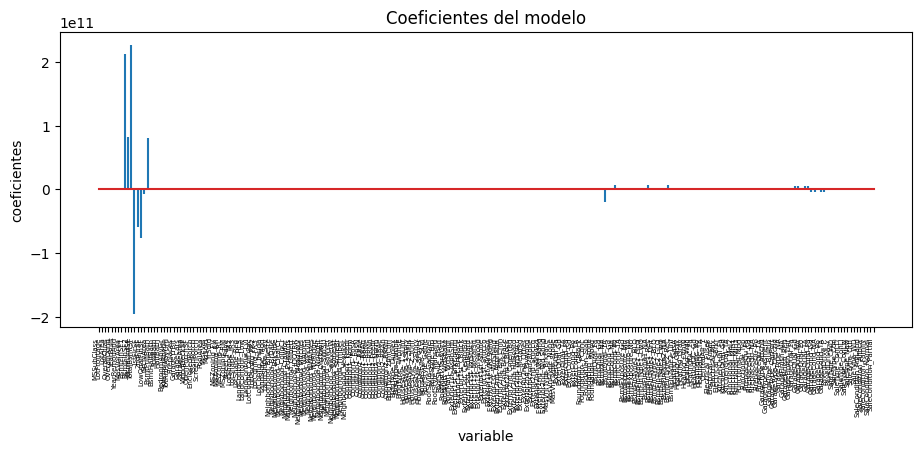

In [111]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': model_reg.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');


In [112]:
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = y_pred,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 49109715.69695306


Emplear RidgeCV, LassoCV o ElasticNetCV. Son adaptaciones que incorporan validación cruzada. Si no se indica nada en el argumento cv, en RidgeCV, se aplica Generalized Cross-Validation (GCV). Si se le indica un valor entero, se aplica validación cruzada con GridSearchCV. Por ejemplo cv=10 equivale a 10-fold cross-validation, en lugar de Generalized Cross-Validation.

## Elastic Net

In [167]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)

# Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

In [168]:
# Evolución del error en función de alpha y l1_ratio

# modelo.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

l1_ratio  modelo.alphas_  mse_cv  rmse_cv
1290      0.99            0.00    0.09     0.30
889       0.90            0.00    0.09     0.30
1089      0.95            0.00    0.09     0.30
1289      0.99            0.00    0.09     0.30
1090      0.95            0.00    0.09     0.30
...        ...             ...     ...      ...
619       0.70           57.38    1.00     1.00
618       0.70           66.70    1.00     1.00
617       0.70           77.53    1.00     1.00
615       0.70          104.74    1.00     1.00
1221      0.99           42.48    1.00     1.00

[1400 rows x 4 columns]

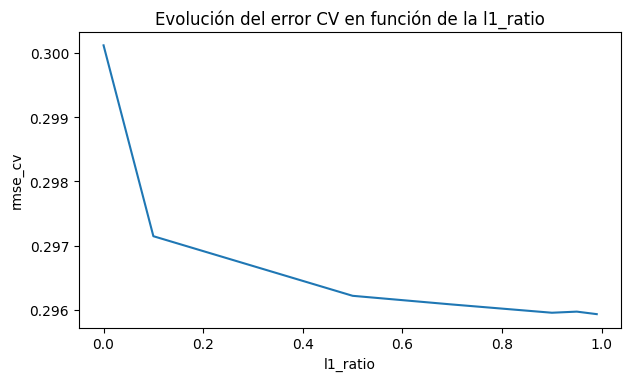

In [169]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

Mejor valor de alpha encontrado: 0.0013200884008314193
Mejor valor de l1_ratio encontrado: 0.99


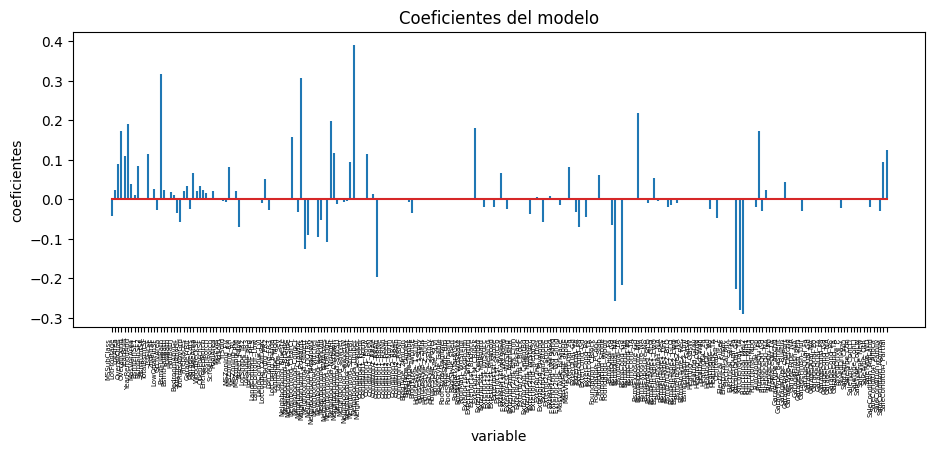

In [170]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [171]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()


In [172]:
# Error de test del modelo
# ==============================================================================
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 0.2955879198293417


Las predicciones del modelo final se alejan en promedio 0.29 unidades del valor real

In [173]:
y_predicciones_train = modelo.predict(X=X_train)

r2_train_en=r2_score(y_train, y_predicciones_train)
r2_test_en = r2_score(y_test, predicciones)
print(f"R2 score train: {r2_train_en}")
print(f"R2 score test: {r2_test_en}")

R2 score train: 0.933302144863126
R2 score test: 0.9121616218005872


## Ridge

In [174]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

Cuando se utiliza regularización, es útil evaluar cómo se aproximan a cero los coeficientes a medida que se incrementa el valor de alpha así como la evolución del error de validación cruzada en función del alpha empleado.

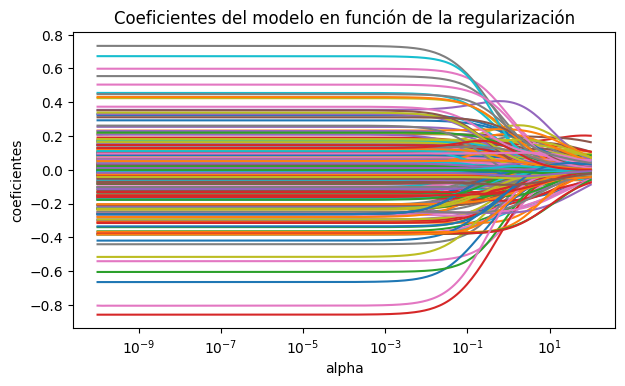

In [175]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()


Puede ver se como, a medida que aumenta el valor de alpha, la regularización es mayor y el valor de los coeficientes se reduce.

In [176]:
# Evolución del error en función de alpha

# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.3
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();


In [177]:
#Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

# Coeficientes del modelo

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

Mejor valor de alpha encontrado: 8.214343584919423


In [178]:
# Predicciones test

predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 1.24113902, -0.78277276, -1.03200121, -0.80299934,  1.02064183,
       -0.55096929, -1.49640821, -0.24949259,  1.86786349,  1.11853773])

In [179]:


# Error de test del modelo

rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 0.2958049829870227


Las predicciones del modelo final se alejan en promedio 0.29 unidades del valor real

In [180]:
y_predicciones_train_r = modelo.predict(X=X_train)

r2_train_ri=r2_score(y_train, y_predicciones_train_r)
r2_test_ri = r2_score(y_test, predicciones)
print(f"R2 score train: {r2_train_ri}")
print(f"R2 score test: {r2_test_ri}")

R2 score train: 0.9377710322566428
R2 score test: 0.9120325672950937


## LASSO

In [181]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)

# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

Cuando se utiliza regularización, es útil evaluar cómo se aproximan a cero los coeficientes a medida que se incrementa el valor de alpha así como la evolución del error de validación cruzada en función del alpha empleado.

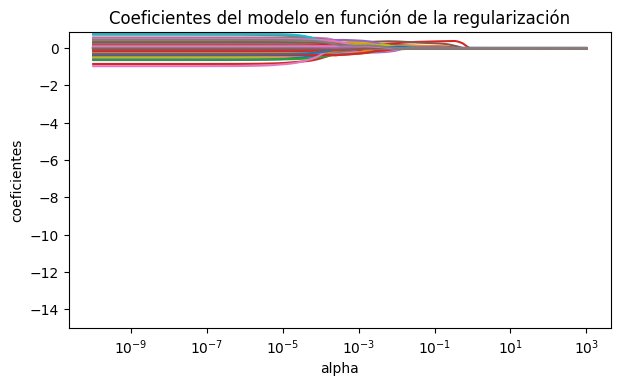

In [182]:
# Evolución de los coeficientes en función de alpha

alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

Puede ver se como, a medida que aumenta el valor de alpha, la regularización es mayor y más predictores quedan excluidos (su coeficiente es 0).

In [183]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

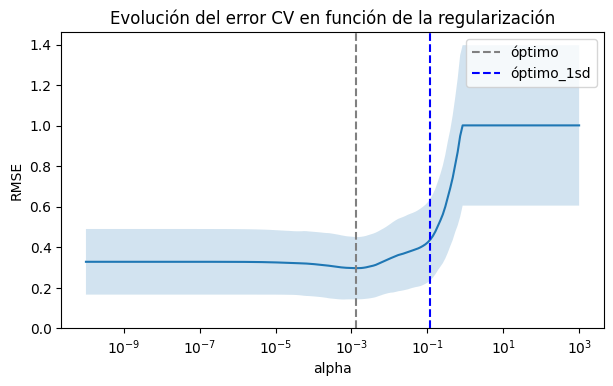

In [184]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();


In [185]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.0013200884008314193


In [186]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [0.12033778]


Se entrena de nuevo el modelo, esta vez empleando el mayor valor de alpha cuyo error está a menos de una desviación típica del mínimo encontrado en la validación cruzada.

In [187]:
optimo_1sd

array([0.12033778])

In [188]:
mejor_optimo=0.12033778
# Mejor modelo alpha óptimo + 1sd
# ==============================================================================
modelo = Lasso(alpha=mejor_optimo)
modelo.fit(X_train, y_train)

Lasso(alpha=0.12033778)

In [189]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

predictor  coef
2        LotArea  0.05
3    OverallQual  0.36
5      YearBuilt  0.10
6   YearRemodAdd  0.05
8     BsmtFinSF1  0.06
11   TotalBsmtSF  0.09
15     GrLivArea  0.25
23    Fireplaces  0.01
25    GarageCars  0.04
26    GarageArea  0.03

De lospredictores disponibles, el modelo final solo incluye 10

In [190]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [191]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 1.02305437, -0.20805727, -0.61672761, -0.86260511,  0.59516648,
       -0.12049185, -1.36159911, -0.5821877 ,  1.59391614,  1.20878185])

In [192]:
# Error de test del modelo
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 0.41891166023504395


Las predicciones del modelo final se alejan en promedio 0.42 unidades del valor real, utilizando solo 10 predictores.

In [193]:
y_predicciones_train_l = modelo.predict(X=X_train)

r2_train_l=r2_score(y_train, y_predicciones_train_l)
r2_test_l = r2_score(y_test, predicciones)
print(f"R2 score train: {r2_train_l}")
print(f"R2 score test: {r2_test_l}")

R2 score train: 0.8143154815533686
R2 score test: 0.8235767395077397


## Comparación Modelos

Se compara el error de test (rmse) de los modelos

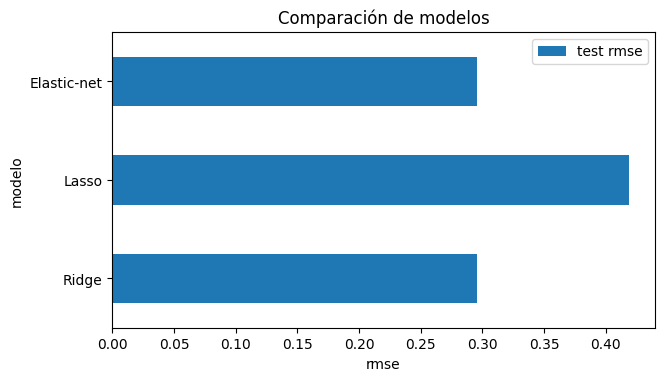

In [194]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [ rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

En este caso el mejor modelo se obtiene aplicando regularización ElasticNet con un rmse de 0.2955879198293417

#Conclusiones

Dado que estos métodos de regularización actúan sobre la magnitud de los coeficientes del modelo, todos deben de estár en la misma escala, por esta razón es necesario estandarizar o normalizar los predictores(Features)  antes de entrenar el modelo.

Lasso consigue excluir los predictores menos relevantes, el modelo final de Ridge incluye todos los predictores

Emplear RidgeCV, LassoCV o ElasticNetCV implica usar adaptaciones que incorporan validación cruzada

El modelo ganador se obtiene aplicando regularizacion con ElasticNet con un rmse de 0.2955879198293417